
Cluster 1 data points:
     sepal_length  sepal_width  petal_length  petal_width     species
51            6.4          3.2           4.5          1.5  versicolor
53            5.5          2.3           4.0          1.3  versicolor
54            6.5          2.8           4.6          1.5  versicolor
55            5.7          2.8           4.5          1.3  versicolor
56            6.3          3.3           4.7          1.6  versicolor
..            ...          ...           ...          ...         ...
133           6.3          2.8           5.1          1.5   virginica
138           6.0          3.0           4.8          1.8   virginica
142           5.8          2.7           5.1          1.9   virginica
146           6.3          2.5           5.0          1.9   virginica
149           5.9          3.0           5.1          1.8   virginica

[61 rows x 5 columns]

Cluster 2 data points:
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1        

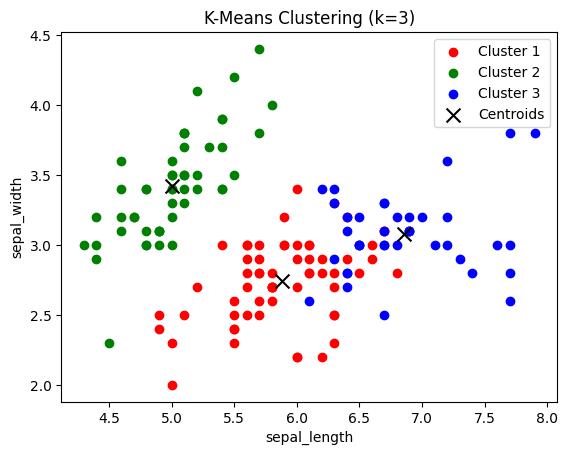

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

def distance(point1, point2): 
    return np.sqrt(np.sum((point1 - point2) ** 2)) 

def kmeans(data, k, max_iterations): 
    centroids = data[np.random.choice(len(data), k, replace=False)] 
    assignments = np.zeros(len(data)) 
    
    for _ in range(max_iterations): 
        for i, point in enumerate(data): 
            distances_to_centroids = [distance(point, centroid) for centroid in centroids] 
            assignments[i] = np.argmin(distances_to_centroids) 
        
        for cluster in range(k): 
            cluster_data = data[assignments == cluster] 
            if len(cluster_data) > 0:  # Avoid division by zero 
                centroids[cluster] = np.mean(cluster_data, axis=0) 
    
    return centroids, assignments 

# Load dataset
data = pd.read_csv('C:\\Users\\Musakalim Khan\\Downloads\\csv-dataset\\iris.csv')

# Extract features
features = data.columns[:-1] 
X = data.iloc[:, :-1].values 

# Define parameters
k = 3 
max_iterations = 100 

# Apply k-means clustering
centroids, assignments = kmeans(X, k, max_iterations) 

# Convert assignments to integer type
to_int_assignments = assignments.astype(int) 

# Clustered data storage
clustered_data = [] 
for i in range(k): 
    clustered_data.append(X[to_int_assignments == i]) 

# Display clustered data
for i in range(k): 
    print(f"\nCluster {i+1} data points:") 
    print(data.iloc[to_int_assignments == i]) 

# Plot results
colors = ['red', 'green', 'blue']  
for i in range(k): 
    plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i+1}") 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids') 
plt.xlabel(features[0]) 
plt.ylabel(features[1]) 
plt.title(f"K-Means Clustering (k={k})") 
plt.legend() 
plt.show()
